In [7]:
import os
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import pickle
from Asearch import *  # Import your A* function
from Abidirectional import *  # Import your Abirectional function
#enter your directory here
directory = r"/Users/uw-user/Documents/AIstuff/AIassignments/Route_optimization/Project"
street_shape = "streets.shp"
streets = gpd.read_file(os.path.join(directory, street_shape))



# Create a graph from the shapefile
G = nx.Graph()

for idx, row in streets.iterrows():
    line = row['geometry']
    if line.geom_type == 'LineString':
        # Get the points along the LineString
        # points = list(line.coords)
        points = [tuple(coord) for coord in line.coords]  # Convert to tuples
        # Loop through each segment in the LineString and add as an edge in the graph
        for i in range(len(points) - 1):
            start = points[i]
            end = points[i + 1]
            
            # Add edge with relevant attributes (you can add more if needed)
            G.add_edge(
                start, 
                end, 
                length=line.length, 
                # speed_limit=row['speedlim'], 
                speed_limit=row.get('speedlim', 0),  # Handle missing attributes safely
               
                road_name=row['st_name']
            )

# Optional: Check the number of nodes and edges in your graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# nx.write_gpickle(G, "graph.gpickle") outdated function
# Save the graph to a file
with open("graph.gpickle", "wb") as f:
    pickle.dump(G, f)
# Load the graph from the file
with open("graph.gpickle", "rb") as f:
    G = pickle.load(f)


Number of nodes: 74945
Number of edges: 77306


In [12]:
#Creating Example nodes
# Define the start and end nodes using positions
start_node = list(G.nodes())[2917]  
goal_node = list(G.nodes())[12540]  

flood_penalty = {
    start_node: 10,  # Example coordinates
    goal_node: 15,  
}
#checking if node in G and has a path to other node
print(f"Start Node: {start_node}, Type: {type(start_node)}")
print(f"Goal Node: {goal_node}, Type: {type(goal_node)}")
print(f"Start Node in G: {start_node in G}")
print(f"Goal Node in G: {goal_node in G}")
if nx.has_path(G, start_node, goal_node):
    print("A path exists between start and goal.")
else:
    print("No path exists between start and goal.")


Start Node: (627217.050231345, 391887.2744385302), Type: <class 'tuple'>
Goal Node: (961468.2203103453, 357662.8996459469), Type: <class 'tuple'>
Start Node in G: True
Goal Node in G: True
A path exists between start and goal.


In [13]:
pos = {node: node for node in G.nodes()}  # Use node coordinates for positioning
print("Positions in 'pos' dictionary:", len(pos))

# Checking for positions of node and their respective cordinates

# for node, coord in enumerate(pos.items()):
#     print(f"Node {node} is at coordinates {coord}")

# Checking to make sure all nodes are tuples
# for node, position in pos.items():
#     print(f"Node: {node}, Position: {position}, Is Tuple?: {isinstance(position, tuple)}")

Positions in 'pos' dictionary: 74945


Path: [(627217.050231345, 391887.2744385302), (627167.8626656793, 391796.1811167821), (626818.2377087623, 391409.6812336147), (626793.6121018454, 391360.43133211136), (626800.9877432622, 391298.8684631139), (626852.674975846, 391234.8689192012), (626997.9876773469, 391156.0872526169), (627335.2373309284, 390988.68141944706), (627623.2987626791, 390836.05639661103), (627793.1753914282, 390727.74394919723), (627896.5505127609, 390639.11847028136), (628027.0495955944, 390451.9938445315), (628145.2373513468, 390294.43149561435), (628243.674818512, 390159.0252703652), (628306.8836815953, 390090.6471262798), (628393.8615260124, 389996.5557790324), (628553.924854178, 389917.7436006963), (628760.6750968471, 389868.5245390311), (629260.4250815958, 389863.5878691152), (629430.3000699282, 389880.83783461154), (629755.2997480109, 389991.6184529513), (629834.1129105948, 390006.39959136397), (629912.8620969281, 390003.93076428026), (630031.0498526804, 389942.368551448), (630159.049924761, 389829.118

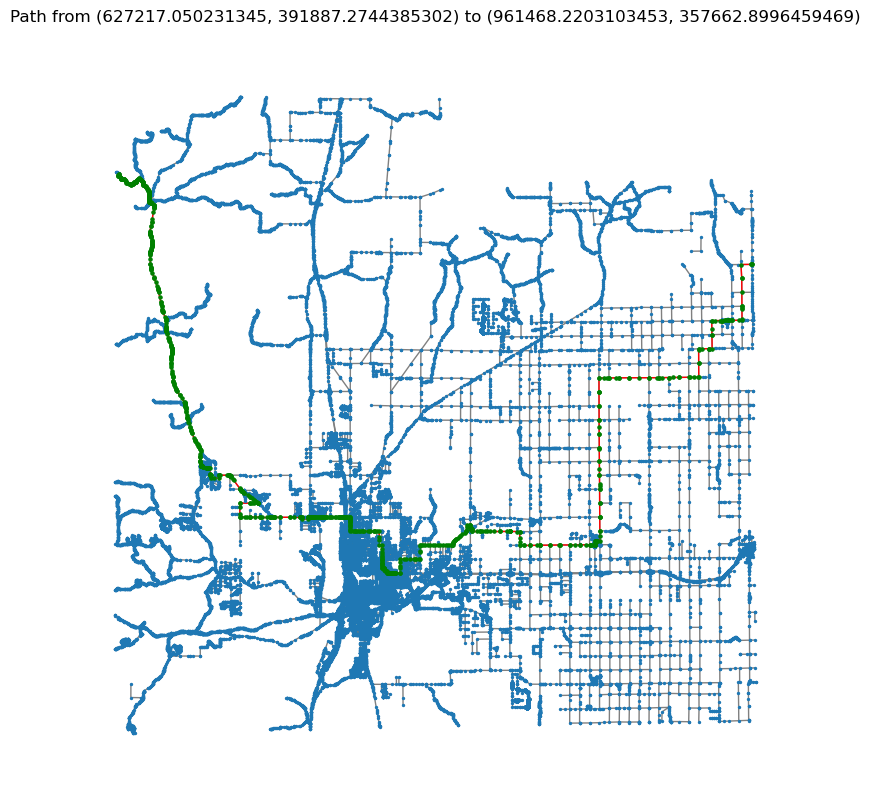

In [18]:
# Find the shortest path (this is using A* search)
path, cost = a_star_search(start_node, goal_node,flood_penalty)
print("Path:", path)

# Visualize the graph and the path
if path:
    # Convert nodes in path to tuples, if necessary to prevent errors
    path = [tuple([node]) if isinstance(node, float) else node for node in path]

    # Create edges for the path
    path_edges = list(zip(path[:-1], path[1:]))
    
    #Checking if edges path are in position list
    # print("Path Edges:",path_edges)
    # for edge in path_edges:
    #     for node in edge:
    #         if node not in pos:
    #             print(f"Node {node} is not in pos")

    fig, ax = plt.subplots(figsize=(10, 10))  # Create the figure and axis explicitly
    nx.draw(G, pos, node_size=2, with_labels=False, ax=ax, edge_color='gray')
    # Highlight the shortest path
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=1, ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green', node_size=5, ax=ax)

    print("Shortest Path is :", path)
    print("Total Cost is :", cost)
    plt.title(f"Path from {start_node} to {goal_node}")
    plt.show()
else:
    print("No path exists")

Path: [(627217.050231345, 391887.2744385302), (627167.8626656793, 391796.1811167821), (626818.2377087623, 391409.6812336147), (626793.6121018454, 391360.43133211136), (626800.9877432622, 391298.8684631139), (626852.674975846, 391234.8689192012), (626997.9876773469, 391156.0872526169), (627335.2373309284, 390988.68141944706), (627623.2987626791, 390836.05639661103), (627793.1753914282, 390727.74394919723), (627896.5505127609, 390639.11847028136), (628027.0495955944, 390451.9938445315), (628145.2373513468, 390294.43149561435), (628243.674818512, 390159.0252703652), (628306.8836815953, 390090.6471262798), (628393.8615260124, 389996.5557790324), (628553.924854178, 389917.7436006963), (628760.6750968471, 389868.5245390311), (629260.4250815958, 389863.5878691152), (629430.3000699282, 389880.83783461154), (629755.2997480109, 389991.6184529513), (629834.1129105948, 390006.39959136397), (629912.8620969281, 390003.93076428026), (630031.0498526804, 389942.368551448), (630159.049924761, 389829.118

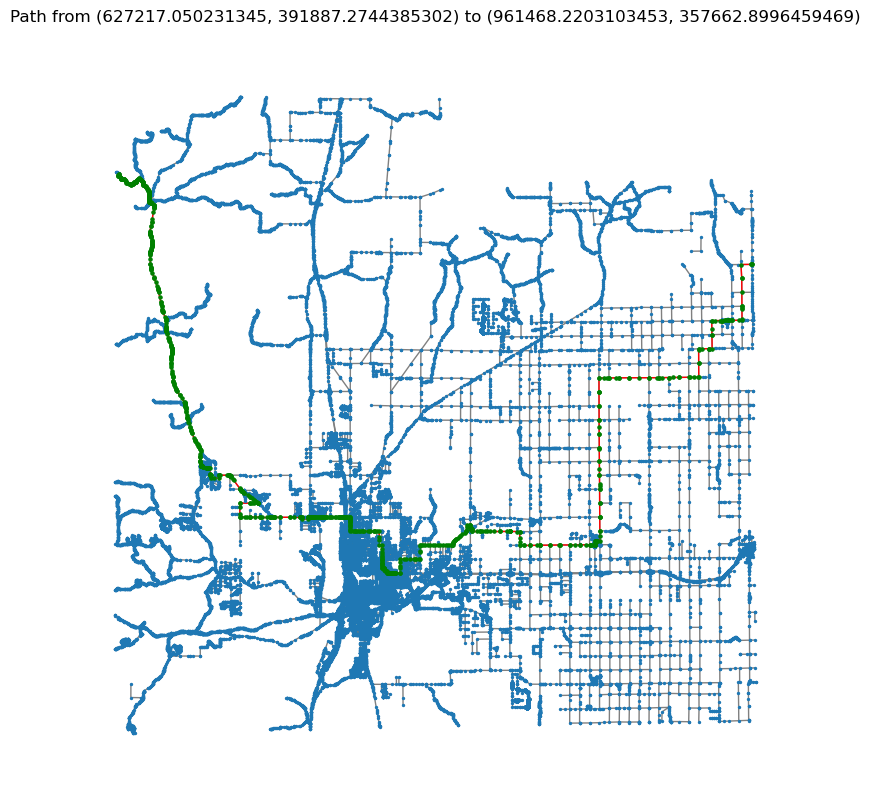

In [19]:
# Find the shortest path (this is using A bidirectional search)
path1, cost1 = bidirectional_a_star(G, start_node, goal_node,flood_penalty)
print("Path:", path1)

# Visualize the graph and the path
if path1:
    # Convert nodes in path to tuples, if necessary to prevent errors
    path1 = [tuple([node]) if isinstance(node, float) else node for node in path]

    # Create edges for the path
    path_edges = list(zip(path1[:-1], path1[1:]))
    fig, ax = plt.subplots(figsize=(10, 10))  # Create the figure and axis explicitly
    nx.draw(G, pos, node_size=2, with_labels=False, ax=ax, edge_color='gray')
    # Highlight the shortest path
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=1, ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green', node_size=5, ax=ax)

    print("Shortest Path is :", path1)
    print("Total Cost is :", cost1)
    plt.title(f"Path from {start_node} to {goal_node}")
    plt.show()
else:
    print("No path exists")

In [113]:
address_shape = "address.shp"
address = gpd.read_file(os.path.join(directory, address_shape))


In [114]:
address.head()
address.columns

Index(['address', 'bldg_no', 'space', 'units', 'st_dir', 'pre_type', 'st_name',
       'st_type', 'suf_dir', 'use', 'remarks', 'zip', 'lot_no', 'blk_tr',
       'sub_name', 'sub_code', 'plat_month', 'plat_year', 'town', 'qrtr_qrtr',
       'quarter', 'section', 'township', 'range', 'co_page', 'zone_code',
       'zone_dist', 'zone_di', 'zone_chr', 'sfha', 'firm_panel', 'fire_resp',
       'vote_dist', 'vote_reps', 'senate', 'house', 'historic', 'source',
       'assigned', 'easting', 'northing', 'latitude', 'longitude',
       'legal_desc', 'owner_name', 'ownr_addr1', 'ownr_addr2', 'ownr_addr3',
       'assmt_dt', 'statepidn', 'addrid', 'join_id', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'globalid', 'geometry'],
      dtype='object')

In [115]:
# Specify the column name
column_name = 'use'  # Change this to the attribute column you're interested in

# Get unique values in the specified column
unique_values = address[column_name].unique()

# Display the unique values
print("Unique values in column '{}':".format(column_name))
for value in unique_values:
    print(value)

Unique values in column 'use':
RESIDENTIAL-SINGLE
RESIDENTIAL-MULTI
COMMERCIAL-MULTI
GOVERNMENT-CITY
COMMERCIAL-SINGLE
SCHOOL
OIL WELL
AGRICULTURAL
GOVERNMENT-STATE
RESIDENTIAL-COMMERCIAL
CHURCH
GOVERNMENT-FEDERAL
VACANT
COMMERCIAL-UTILITY
ACCESSORY
GOVERNMENT-COUNTY
SCHOOL-OTHER
CHURCH-OTHER
OTHER
OIL-OTHER
NA
None
UTILITY
RESIDENTIAL


In [116]:
# Define the output text file path
output_file_path = 'unique_address_uses.txt'

# Save unique values to the text file
with open(output_file_path, 'w') as file:
    file.write("Unique values in column '{}':\n".format(column_name))
    for value in unique_values:
        file.write(str(value) + '\n')

print("Unique values have been saved to", output_file_path)

Unique values have been saved to unique_address_uses.txt
